# PART 1:

## Exercise 1

#### Part A: 

In [2]:
#First we import the usual libraries: 
import pyvista as pv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.optimize as opt

In [2]:
#defininf the frenquecy fuction: 

def frenquency(period):
    '''
    This functions calcualtes the angular frenquecy
    -------------------------------------------------------------------------
    PARAMETERS: 
    -peroid
    -------------------------------------------------------------------------
    OUTPUT:
    -Retruns the angular frnquecy given a certain peroid(T)
    -------------------------------------------------------------------------
    '''
    
    w = (2*np.pi)/period
    
    return w

In [11]:
#given the periods: 

t_earth = 356 
t_moon = 27.3
t_geo = 1 

#Calculating the frequencys: 
w_earth = frenquency(t_earth)
w_moon = frenquency(t_moon)
w_geo = frenquency(t_geo)

#print: 
#print(w_earth,w_moon,w_geo)

#### Part B 

In [23]:
#Creating the time vector in days: 
time = np.linspace(0,365,366)

#Defining R and r: 
R_i = 1.5*(10)**8 
r_moon = 3.8*(10)**5 
r_geo = 3.6*(10)**4

#### Part C

In [24]:
#Defininf the function for xi and yi: 
def orbits(R_i,r_i,w_i,w_earth,time): 
    '''
    This functions calcualtes the orbits for moon and geo
    -------------------------------------------------------------------------
    PARAMETERS: 
    -R and r_i
    -------------------------------------------------------------------------
    OUTPUT:
    -Retruns the the orbits for moon and geo
    -------------------------------------------------------------------------
    '''
    #First we define the x and y for earth:
    x_earth = R_i*(np.cos(w_earth*time))
    y_earth = R_i*(np.sin(w_earth*time))
    
    #Define x and y for the r_i: 
    x_i = x_earth + r_i*(np.cos(w_i*time))
    y_i = y_earth + r_i*(np.sin(w_i*time))
    
    return x_i,y_i,x_earth,y_earth

In [25]:
#calcualting: 
x_moon,y_moon,x_earth_m,y_earth_m = orbits(R_i,r_moon,w_moon,w_earth,time)
x_geo,y_geo,x_earth_g,y_earth_g = orbits(R_i,r_geo,w_geo,w_earth,time)

#Checking: 
#print((y_geo))
#print(len(y_geo))

In [27]:
# Creating data frame
df = pd.DataFrame({"time": time, "x_earth": x_earth_m, \
                  "y_earth":  y_earth_m, "x_moon":x_moon, \
                  "y_moon":  y_moon,"x_geo":x_geo,"y_geo":y_geo})
#print(df)
#Creating the directory: 
os.makedirs("/home/jdiego/Documents/Computacional_1/midterm")

#Saving as csv file:
df.to_csv("/home/jdiego/Documents/Computacional_1/midterm/data.csv", sep=',', float_format='{:.2e}'.format)

#### Part D: 

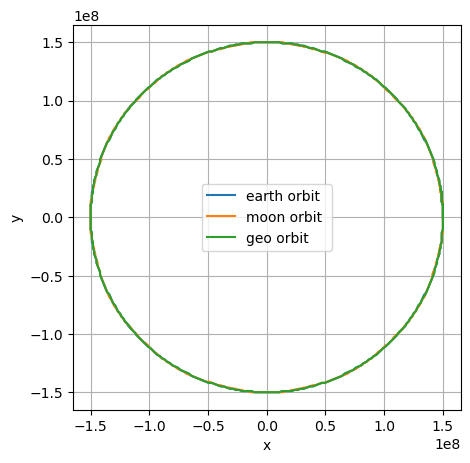

In [38]:
#getting the data:
data = pd.read_csv("/home/jdiego/Documents/Computacional_1/midterm/data.csv", sep=',')

#Creatign the arrays:
time = np.array(data['time'])
x_earth = np.array(data['x_earth'])
y_earth = np.array(data['y_earth'])
x_moon = np.array(data['x_moon'])
y_moon = np.array(data['y_moon'])
x_geo = np.array(data['x_geo'])
y_geo = np.array(data['y_geo'])


#Checking: 
#print(len(x_moon))


#Ploting: 
plt.figure(figsize = (5,5))
plt.plot(x_earth,y_earth,label = 'earth orbit ')
plt.plot(x_moon,y_moon,label = 'moon orbit ')
plt.plot(x_geo,y_geo,label = 'geo orbit ')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

## Exercise 2 

#### Part A

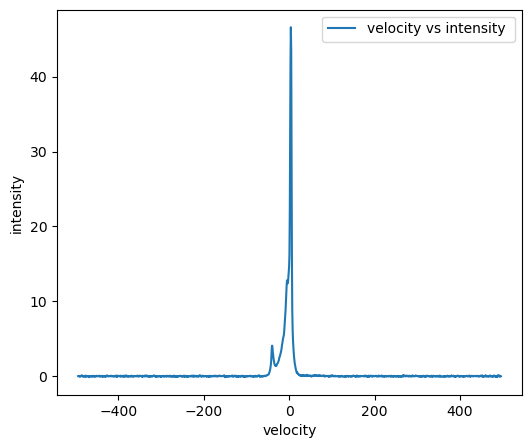

In [2]:
#getting the data:
data1 = pd.read_csv("/home/jdiego/Documents/Computacional_1/midterm/gass_spectra.txt")
#checking the data
#print(data1.keys())

#Creatign the arrays:
vel = np.array(data1['Velocity'])
inten = np.array(data1['Intensity'])


#Poting: 
#Ploting: 
plt.figure(figsize = (6,5))
plt.plot(vel,inten,label = 'velocity vs intensity ')
plt.xlabel("velocity")
plt.ylabel("intensity")
plt.legend()
plt.show()


##### We can see just one big gaussian emission with tuw small picks on it's left side. This picks also seems to have a gaussian form so they might me also H1 clouds but with the recolected data we are not able to "see" them

#### Part B

In [20]:
#To define the multi gaussian function we use the astropy library: 
import astropy.modeling as mod

#We use the LM method
fitter = mod.fitting.LevMarLSQFitter()

#Setting a model with three gaussians:
model = mod.models.Gaussian1D()+ mod.models.Gaussian1D()+ mod.models.Gaussian1D()

#Fitting the model
fitted_model = fitter(model, vel, inten)

#### Part C

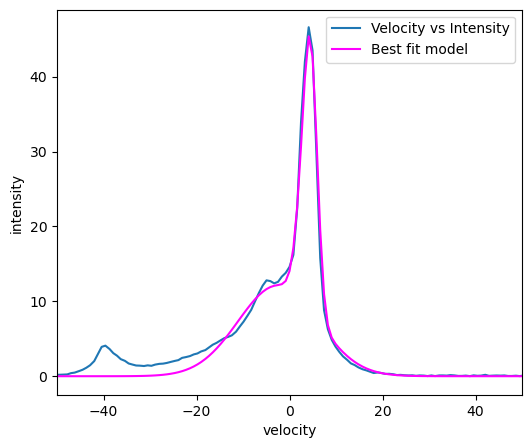

In [21]:
plt.figure(figsize = (6,5))
plt.plot(vel, inten, label = "Velocity vs Intensity")
plt.plot(vel, fitted_model(vel), label = "Best fit model", color = "magenta", linestyle = "-")
plt.xlabel("velocity")
plt.ylabel("intensity")
plt.xlim(-50, +50)
plt.legend()
plt.show()

## Exercise 3

### Part A

In [3]:
#Creating the meshgrid: 
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
xv, yv = np.meshgrid(x, y)

#Checking: 
#print(len(yv))

### Part B

In [4]:
#Creating the function: 
def random_fields(dimension):
    '''
    This functions generates a 2D random fields.
    -------------------------------------------------------------------------
    PARAMETERS: 
    -dimesion of the filds()
    -------------------------------------------------------------------------
    OUTPUT:
    -Retruns 2D random fields
    -----
    '''
    #A random field:
    #Fixing the random values with random.seed():
    np.random.seed(0)
    random_field = np.random.rand(dimension,2)
    
    #A random gaussian_field:
    np.random.seed(0)
    gaussian_field = np.random.randn(dimension,2)
    
    #A random log_field:
    np.random.seed(0)
    log_normal = np.random.lognormal(size = (dimension,2))
    
    return random_field,gaussian_field,log_normal

### Part C

In [5]:
#dimension of the arrays: 
dimension = len(xv)

#Getting the 2D arrays: 
norm , gaussian, log_normal = random_fields(dimension)


In [6]:
#Modulus of normal random field: 
mod_n, mod_g, mod_l =[],[],[]

for i in range(len(norm)):
    
    mod = np.sqrt(norm[i][0]**2 + norm[i][1])
    mod_n.append(mod)
    
    mod1 = np.sqrt(gaussian[i][0]**2 + gaussian[i][1]**2)
    mod_g.append(mod1)
    
    mod2 = np.sqrt(log_normal[i][0]**2 + log_normal[i][1]**2)
    mod_l.append(mod2)
    
mod_n, mod_g, mod_l = np.array(mod_n), np.array(mod_g), np.array(mod_l)

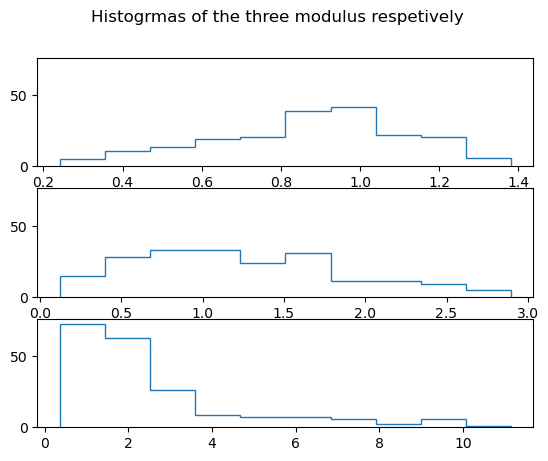

In [7]:
# Histogram plot:

#-----------------------------------------------
#Code recycled from https://matplotlib.org.com
#-----------------------------------------------
fig, axs = plt.subplots(3 ,sharey=True)
fig.suptitle('Histogrmas of the three modulus respetively')
axs[0].hist(mod_n, histtype = "step")
axs[1].hist(mod_g, histtype = "step")
axs[2].hist(mod_l, histtype = "step")
plt.show()
#-----------------------------------------------

###  Part D

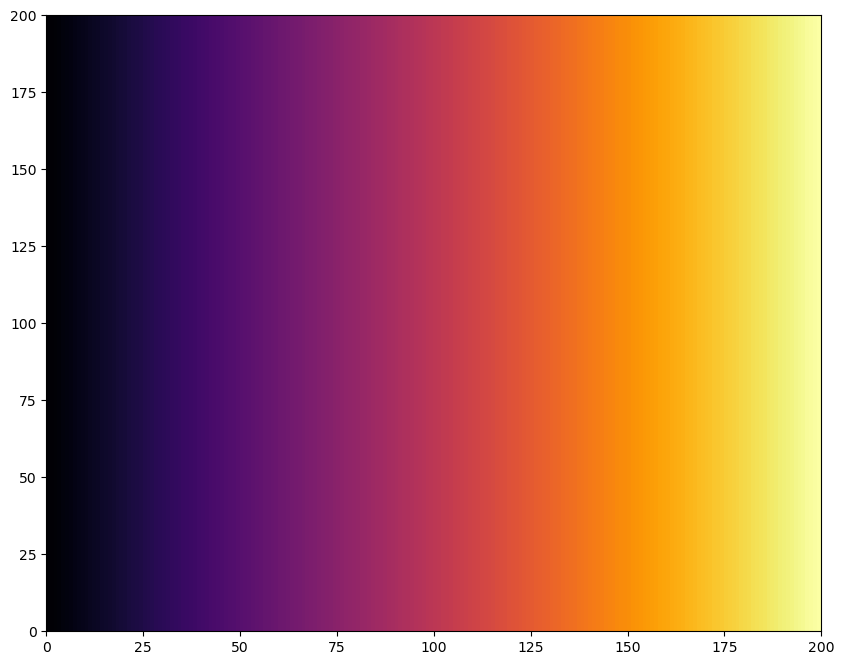

In [8]:
# Plot the magnetic flux density (B)
plt.figure(figsize = (10,8))
plt.pcolor(xv, cmap = "inferno")
plt.show()